# <center> Holiday Package Prediction

## TOC:
* [](#)
* [Second Bullet Header](#second-bullet)


# step1: importing libraries

In [1]:
#we write the libraries at the begining :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step2: Reading and defined the dataset

In [2]:
#we loading and reading our dataset by using pandas
#we give the datafram a name as (hp) which is shortcut for holiday package

hp = pd.read_csv('Travel.csv')

In [3]:
#display first five rowes of dataset.

hp.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
#we print the names of all columns in our dataset.

hp.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

## Step3:Exploratory Data Analysis (EDA)

EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset.

In [5]:
#we use this code to display how many dataset contain rwos and features.

hp.shape

(4888, 20)

In [6]:
#we use info to display general information about our data set to understand the following:
#1- Number of columns and rowes.
#2- Name of columns and how many values inside it.
#3- Datatyep.
#4- To findout if there (missing values- Non-null).

hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [7]:
#we use this method to find missing value when True = Missing value & False = No missing value.

hp.isna()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4884,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4885,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4886,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#we use this function to returns the number of missing values in each column.

hp.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [9]:
# this method is used to calculate the percentage of missing data.

hp.isna().sum()/hp.shape[0]

CustomerID                  0.000000
ProdTaken                   0.000000
Age                         0.046236
TypeofContact               0.005115
CityTier                    0.000000
DurationOfPitch             0.051350
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.009206
ProductPitched              0.000000
PreferredPropertyStar       0.005319
MaritalStatus               0.000000
NumberOfTrips               0.028642
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    0.013502
Designation                 0.000000
MonthlyIncome               0.047668
dtype: float64

# # Step 4: Dropping

In this step when we want remove some columns that unnecessary .

In [10]:
#Creat a copy of dataset with name hp2 to delete the columns without change in original data.
#hp2 is the name of the copied dataset that we going to work on.

hp2= hp.copy()

In [11]:
#to insure that (hp2) is the copy of (hp) we showe the head of dataset.

hp2.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### we removed 3 columns that contain a missing values but not usefull in the dataset. 

In [12]:
hp2.drop('DurationOfPitch',inplace=True,axis=1)

In [13]:
hp2.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [14]:
hp2.drop('NumberOfFollowups',inplace=True , axis=1)

In [15]:
hp2.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,Salaried,Female,3,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,Salaried,Male,3,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,Free Lancer,Male,3,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,Salaried,Female,2,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,Small Business,Male,2,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [16]:
hp2.drop('NumberOfChildrenVisiting',inplace=True , axis=1)

In [17]:
hp2.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,Salaried,Female,3,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0
1,200001,0,49.0,Company Invited,1,Salaried,Male,3,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,Free Lancer,Male,3,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,Salaried,Female,2,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,Small Business,Male,2,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0


In [18]:
# showe the numbers of columns after dropping.

hp2.shape

(4888, 17)

In [19]:
hp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4888 non-null   int64  
 1   ProdTaken               4888 non-null   int64  
 2   Age                     4662 non-null   float64
 3   TypeofContact           4863 non-null   object 
 4   CityTier                4888 non-null   int64  
 5   Occupation              4888 non-null   object 
 6   Gender                  4888 non-null   object 
 7   NumberOfPersonVisiting  4888 non-null   int64  
 8   ProductPitched          4888 non-null   object 
 9   PreferredPropertyStar   4862 non-null   float64
 10  MaritalStatus           4888 non-null   object 
 11  NumberOfTrips           4748 non-null   float64
 12  Passport                4888 non-null   int64  
 13  PitchSatisfactionScore  4888 non-null   int64  
 14  OwnCar                  4888 non-null   

# #Step 5: Cleaning

In [20]:
#The describe is used for calculating some statistical data like min, mean and std of the numerical values of the DataFrame

hp2.describe()

,CustomerID,ProdTaken,Age,CityTier,NumberOfPersonVisiting,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4888.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,2.905074,3.581037,3.236521,0.290917,3.078151,0.620295,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,0.724891,0.798009,1.849019,0.454232,1.365792,0.485363,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,3.000000,3.000000,3.000000,0.000000,3.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,3.000000,4.000000,4.000000,1.000000,4.000000,1.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,5.000000,5.000000,22.000000,1.000000,5.000000,1.000000,98678.000000


we have to clean 5 column that contain missing values.
this columns is : {Age , TypeOfContact , PreferredPropertyStar , NumberOfTrips , MonthlyIncome}

### THIS DIAGRAMS SHOWS COLUMNS BEFORE CLEANING

(array([ 171.,  282.,  662., 1037.,  742.,  573.,  495.,  309.,  249.,
         142.]),
 array([18. , 22.3, 26.6, 30.9, 35.2, 39.5, 43.8, 48.1, 52.4, 56.7, 61. ]),
 <BarContainer object of 10 artists>)

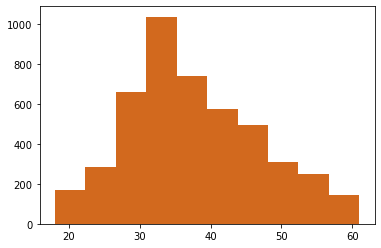

In [21]:
#we showe if this plot is skweed or normal

plt.hist(hp2['Age'], color = "chocolate")

In [22]:
hp2.Age.fillna(hp2.Age.mean(),inplace=True)

In [23]:
hp2.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact              25
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
ProductPitched              0
PreferredPropertyStar      26
MaritalStatus               0
NumberOfTrips             140
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
Designation                 0
MonthlyIncome             233
dtype: int64

(array([2993.,    0.,    0.,    0.,    0.,  913.,    0.,    0.,    0.,
         956.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 10 artists>)

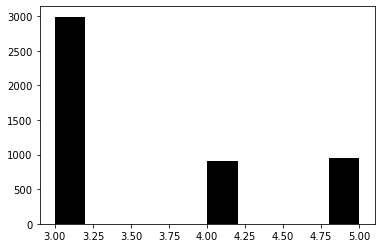

In [24]:
#we showe if this plot is skweed or normal

plt.hist(hp2['PreferredPropertyStar'], color = "black")

In [25]:
hp2.PreferredPropertyStar.fillna(hp2.PreferredPropertyStar.mean(),inplace=True)

In [26]:
hp2.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact              25
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips             140
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
Designation                 0
MonthlyIncome             233
dtype: int64

(array([3.163e+03, 9.360e+02, 5.400e+02, 1.050e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ]),
 <BarContainer object of 10 artists>)

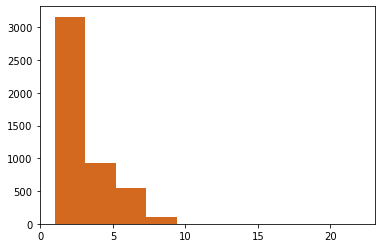

In [27]:
#we showe if this plot is skweed or normal

plt.hist(hp2['NumberOfTrips'], color = "chocolate")

In [28]:
hp2.NumberOfTrips.fillna(hp2.NumberOfTrips.mean(),inplace=True)

In [29]:
hp2.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact              25
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
Designation                 0
MonthlyIncome             233
dtype: int64

(array([2.000e+00, 1.227e+03, 2.843e+03, 5.810e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([ 1000. , 10767.8, 20535.6, 30303.4, 40071.2, 49839. , 59606.8,
        69374.6, 79142.4, 88910.2, 98678. ]),
 <BarContainer object of 10 artists>)

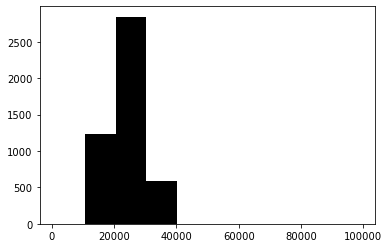

In [30]:
#we showe if this plot is skweed or normal

plt.hist(hp2['MonthlyIncome'], color = "black")

In [31]:
hp2.MonthlyIncome.fillna(hp2.MonthlyIncome.mean(),inplace=True)

In [32]:
hp2.isna().sum()

CustomerID                 0
ProdTaken                  0
Age                        0
TypeofContact             25
CityTier                   0
Occupation                 0
Gender                     0
NumberOfPersonVisiting     0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
Designation                0
MonthlyIncome              0
dtype: int64

<AxesSubplot:xlabel='TypeofContact', ylabel='count'>

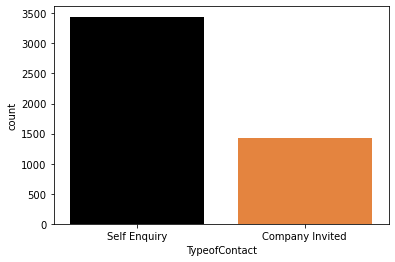

In [33]:
# We use this function cuz the types of (TypeofContact) is object

sns.countplot(x="TypeofContact", data=hp2, palette=["#000000",   "#FF7F24"])

In [34]:
hp2.TypeofContact.fillna(hp2.TypeofContact.mode()[0],inplace=True)

In [35]:
hp2.isna().sum()

CustomerID                0
ProdTaken                 0
Age                       0
TypeofContact             0
CityTier                  0
Occupation                0
Gender                    0
NumberOfPersonVisiting    0
ProductPitched            0
PreferredPropertyStar     0
MaritalStatus             0
NumberOfTrips             0
Passport                  0
PitchSatisfactionScore    0
OwnCar                    0
Designation               0
MonthlyIncome             0
dtype: int64

### THIS DIAGRAMS SHOWS COLUMNS AFTER CLEANING

(array([ 171.,  282.,  662., 1037.,  968.,  573.,  495.,  309.,  249.,
         142.]),
 array([18. , 22.3, 26.6, 30.9, 35.2, 39.5, 43.8, 48.1, 52.4, 56.7, 61. ]),
 <BarContainer object of 10 artists>)

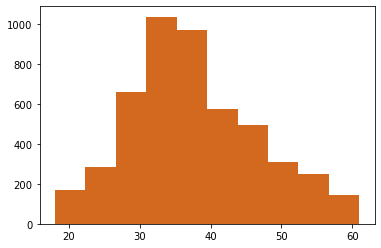

In [36]:
#this diagram showe the result after cleaning missing values for the Age column.

plt.hist(hp2['Age'], color = "chocolate")

(array([2993.,    0.,   26.,    0.,    0.,  913.,    0.,    0.,    0.,
         956.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 10 artists>)

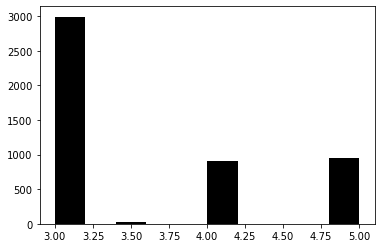

In [37]:
#this diagram showe the result after cleaning missing values for the PreferredPropertyStar column.

plt.hist(hp2['PreferredPropertyStar'], color = "black")

(array([3.163e+03, 1.076e+03, 5.400e+02, 1.050e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ]),
 <BarContainer object of 10 artists>)

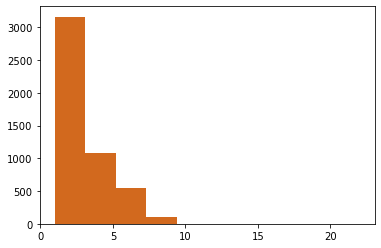

In [38]:
#this diagram showe the result after cleaning missing values for the NumberOfTrips column.

plt.hist(hp2['NumberOfTrips'], color = "chocolate")

(array([2.000e+00, 1.227e+03, 3.076e+03, 5.810e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([ 1000. , 10767.8, 20535.6, 30303.4, 40071.2, 49839. , 59606.8,
        69374.6, 79142.4, 88910.2, 98678. ]),
 <BarContainer object of 10 artists>)

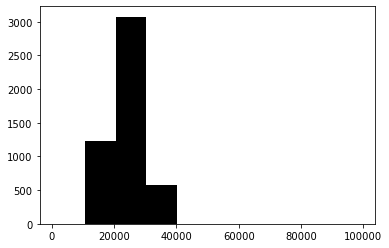

In [39]:
#this diagram showe the result after cleaning missing values for the MonthlyIncome column.

plt.hist(hp2['MonthlyIncome'], color = "black")

<AxesSubplot:xlabel='TypeofContact', ylabel='count'>

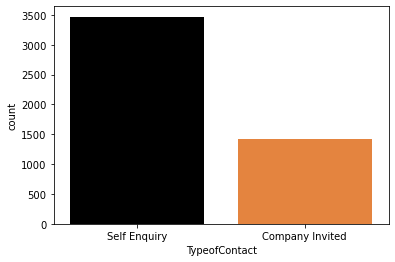

In [40]:
#this diagram showe the result after cleaning missing values for the TypeofContact column.

sns.countplot(x="TypeofContact", data=hp2, palette=["#000000",   "#FF7F24"])

## Step 6: visualization

In [41]:
hp2.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,Salaried,Female,3,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0
1,200001,0,49.000000,Company Invited,1,Salaried,Male,3,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0
2,200002,1,37.000000,Self Enquiry,1,Free Lancer,Male,3,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0
3,200003,0,33.000000,Company Invited,1,Salaried,Female,2,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0
4,200004,0,37.622265,Self Enquiry,1,Small Business,Male,2,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0


<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

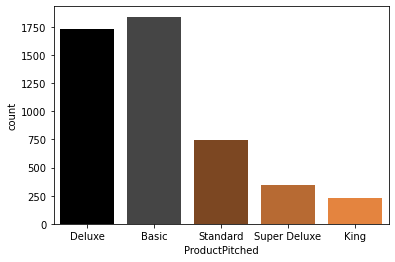

In [42]:
# which packages are most likely to select from customers?

sns.countplot(x="ProductPitched", data=hp2, palette=["#000000","#454545","#8B4513","#CD661D","#FF7F24"])

The Basic package is the most slected from the customer.

<AxesSubplot:xlabel='ProdTaken', ylabel='count'>

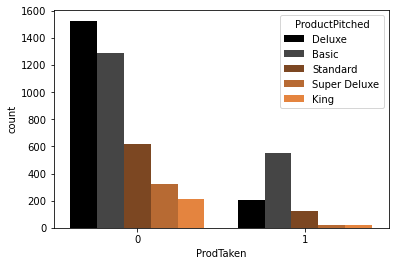

In [43]:
# which packages are most likely to purchased from customers?

sns.countplot(x="ProdTaken", data=hp2,hue='ProductPitched', palette=["#000000","#454545","#8B4513","#CD661D","#FF7F24"])

customers choose the deluxe but they buy the basic package

C:\Users\nehal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProdTaken', ylabel='count'>

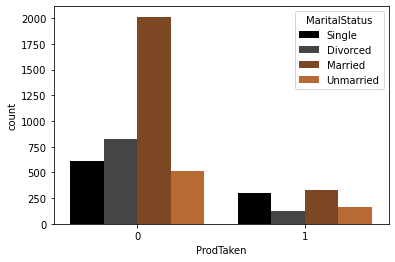

In [44]:
#Is The marital status has impact of choosen the product?

sns.countplot(hp2.ProdTaken,hue='MaritalStatus',data=hp2 , palette=["#000000","#454545","#8B4513","#CD661D"])

we noticed that the customer with married status are the most customer purchase the packages.

C:\Users\nehal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Passport', ylabel='count'>

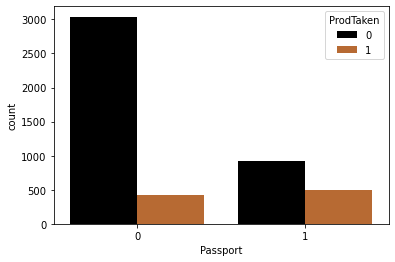

In [45]:
# how many customer are purchased the product and have passport?

sns.countplot(hp2.Passport ,hue='ProdTaken', data=hp2 , palette=["#000000", "#CD661D"])

there is no significant effect of having passport or not.

<AxesSubplot:xlabel='Designation', ylabel='count'>

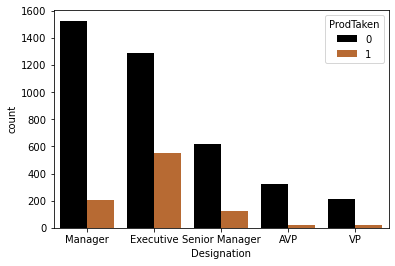

In [46]:
# is the Designation have impact of take the product?

sns.countplot(x="Designation",hue='ProdTaken', data=hp2, palette=["#000000","#CD661D"])

-customers with designation as Manager have the most reservation  
-customers with designation as Executive are the most customers taken the product.

<AxesSubplot:xlabel='CityTier', ylabel='count'>

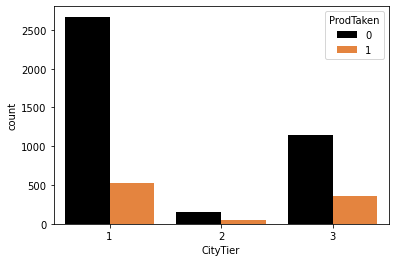

In [47]:
#Which segment of customers should be targeted more?

sns.countplot(x="CityTier", data=hp2,hue='ProdTaken' , palette=["#000000","#FF7F24"])

we recommend that the company should targeted city tire 2 more .

In [48]:
#we want to show the Gender columns unique values.

hp2['Gender'].unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

C:\Users\nehal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProdTaken', ylabel='count'>

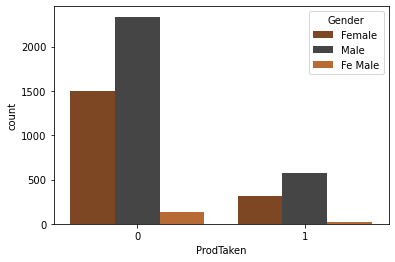

In [49]:
# we want to display which the most gender are take the product 

sns.countplot(hp2.ProdTaken,hue='Gender',data=hp2 , palette=["#8B4513","#454545","#CD661D","#FF7F24"])

As you see the men are most likely to take the product.

C:\Users\nehal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


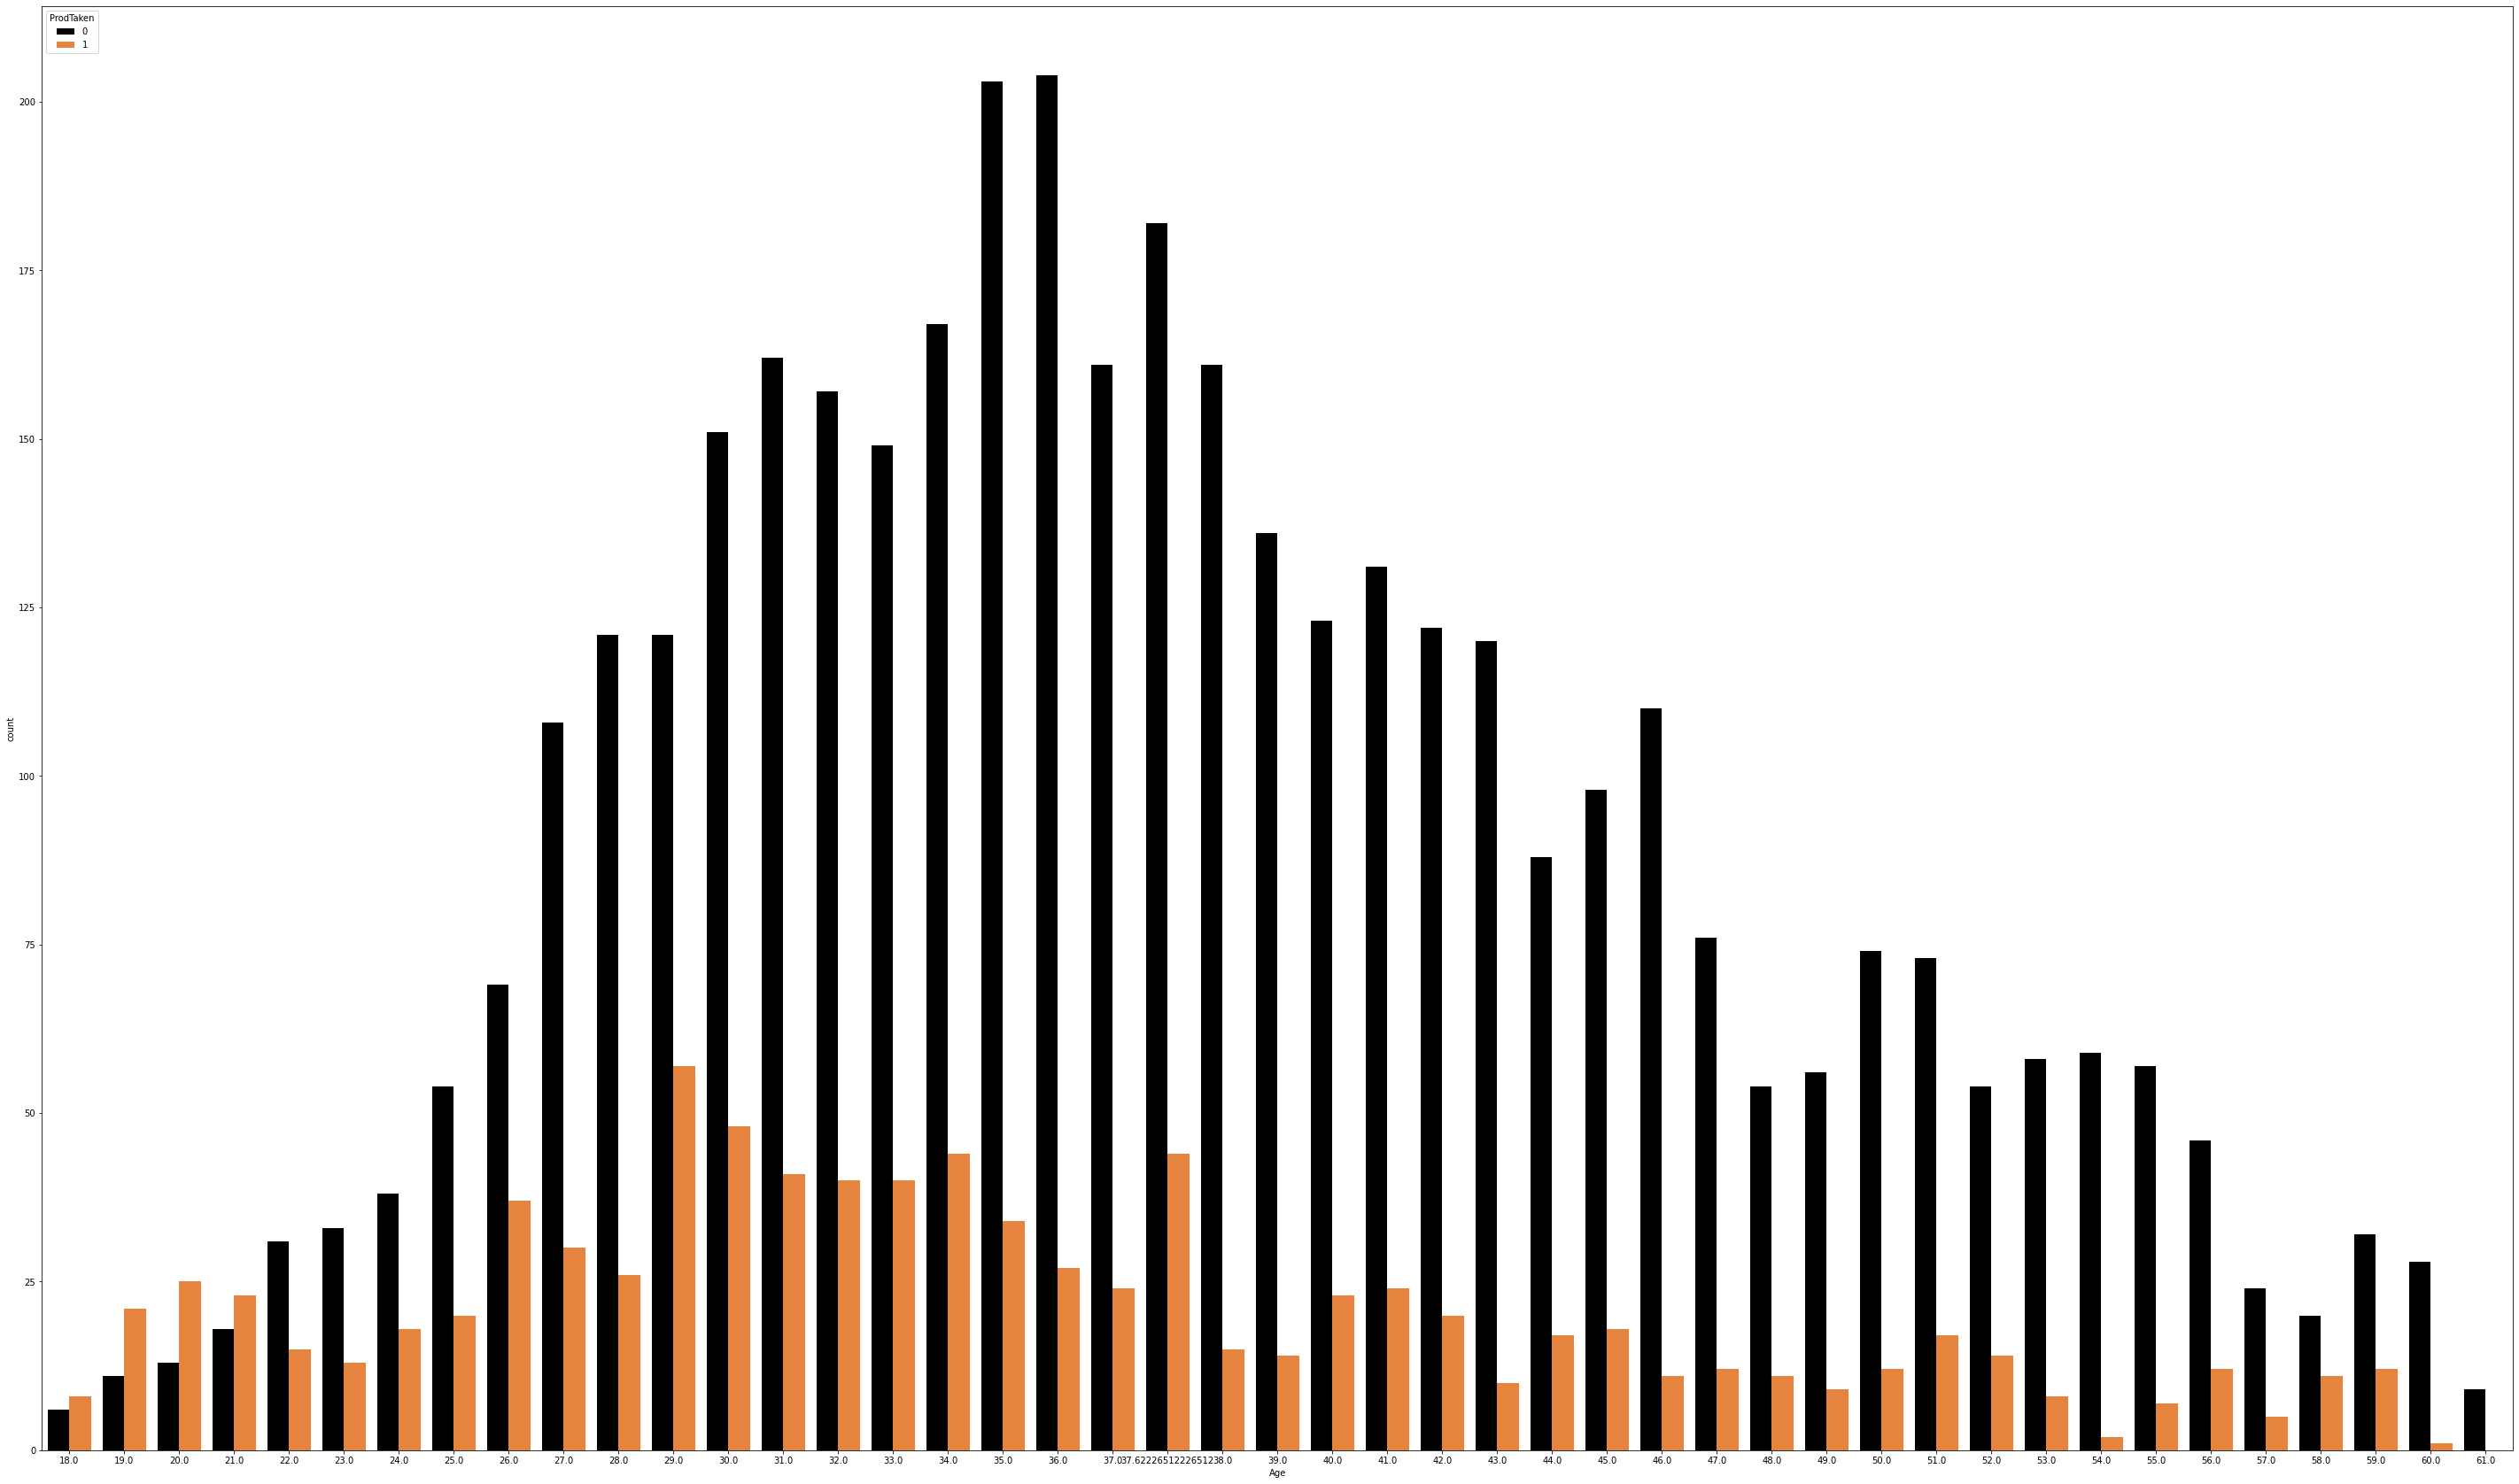

In [50]:
#How old the customers who take the packages?

plt.figure(figsize=[50,30])
sns.countplot(hp2.Age,hue='ProdTaken',data=hp2 , palette=["#000000","#FF7F24"]);

when you look to the diagram we see that the 29 years old are the most customer we have

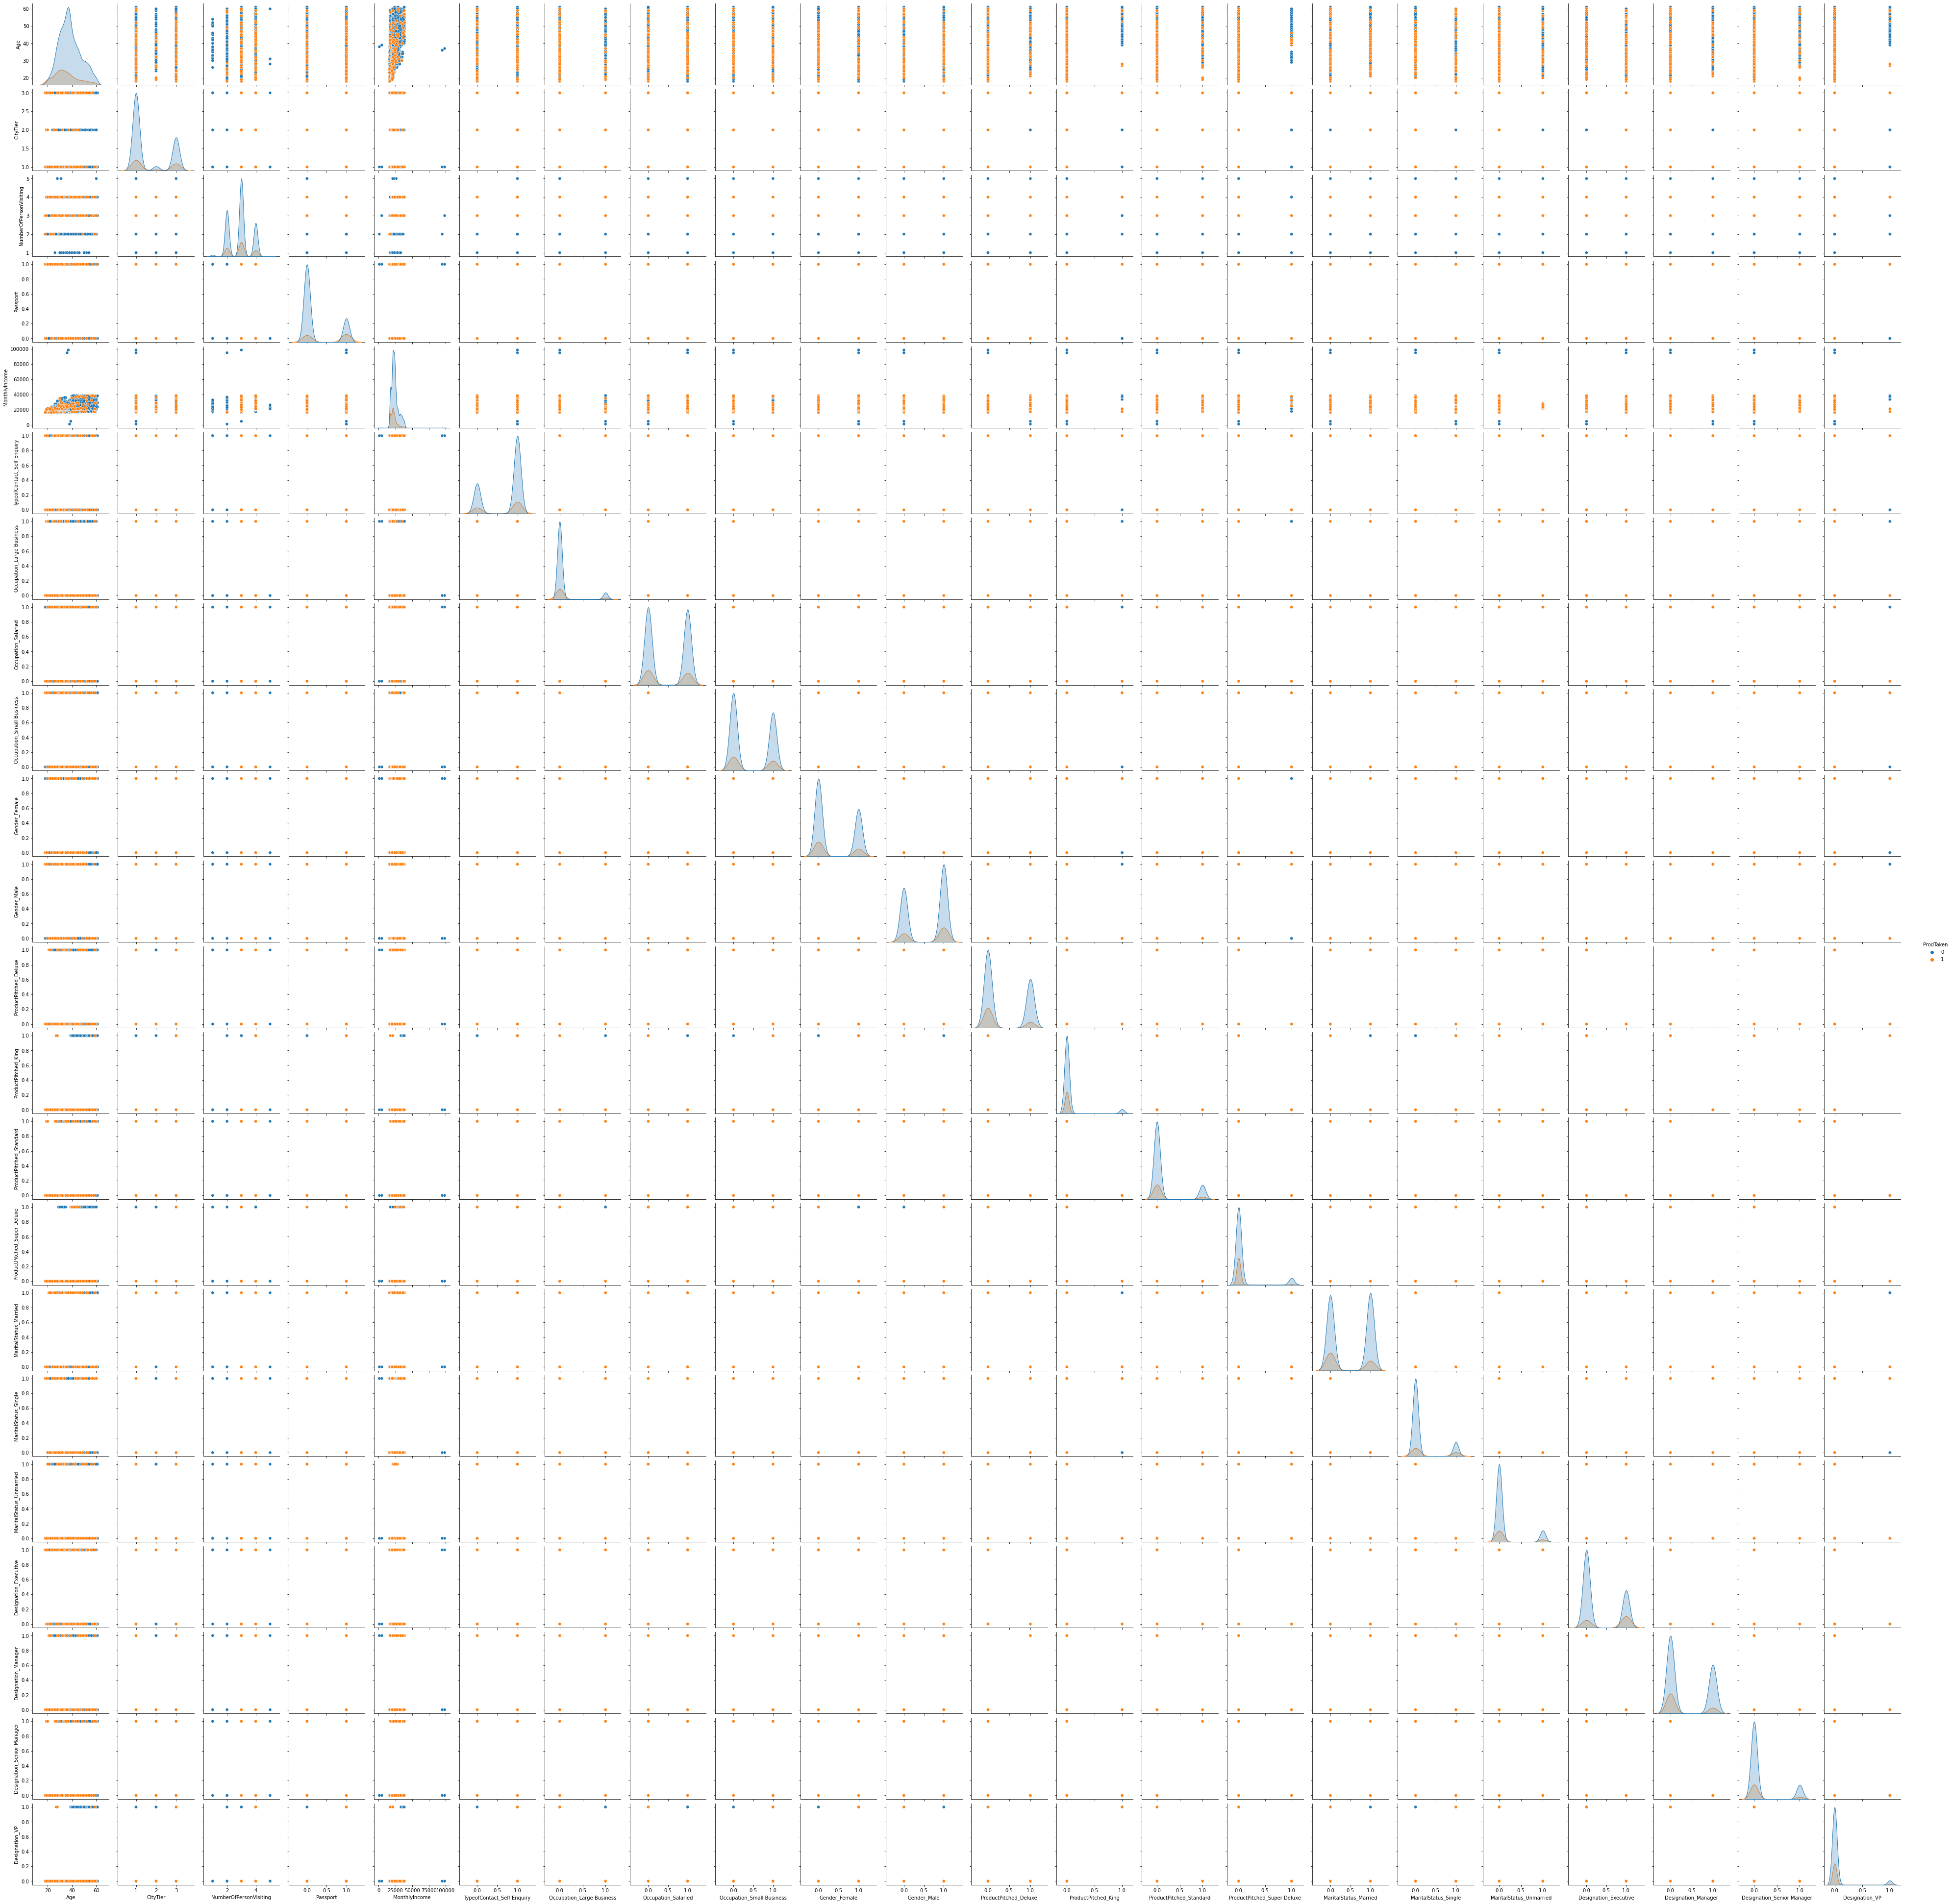

In [122]:
#we use pairplot to Understand the best set of featuers to explain a relationship between two variables.

sns.pairplot(hp2,diag_kind='kde',hue='ProdTaken')

## Step7: preprocessing for modeling

In [52]:
#display the dataset columns before drop

hp2.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,Salaried,Female,3,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0
1,200001,0,49.000000,Company Invited,1,Salaried,Male,3,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0
2,200002,1,37.000000,Self Enquiry,1,Free Lancer,Male,3,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0
3,200003,0,33.000000,Company Invited,1,Salaried,Female,2,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0
4,200004,0,37.622265,Self Enquiry,1,Small Business,Male,2,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0


In [53]:
#we dropped some columns not useful in the modiling process.

hp2.drop(columns=['OwnCar','PitchSatisfactionScore','PreferredPropertyStar','NumberOfTrips','CustomerID'],inplace=True)

In [54]:
#display the dataset columns after drop

hp2.head()

,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,ProductPitched,MaritalStatus,Passport,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,Salaried,Female,3,Deluxe,Single,1,Manager,20993.0
1,0,49.000000,Company Invited,1,Salaried,Male,3,Deluxe,Divorced,0,Manager,20130.0
2,1,37.000000,Self Enquiry,1,Free Lancer,Male,3,Basic,Single,1,Executive,17090.0
3,0,33.000000,Company Invited,1,Salaried,Female,2,Basic,Divorced,1,Executive,17909.0
4,0,37.622265,Self Enquiry,1,Small Business,Male,2,Basic,Divorced,0,Executive,18468.0


In [55]:
#display data type before convirting to dummy.

hp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4888 non-null   int64  
 1   Age                     4888 non-null   float64
 2   TypeofContact           4888 non-null   object 
 3   CityTier                4888 non-null   int64  
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfPersonVisiting  4888 non-null   int64  
 7   ProductPitched          4888 non-null   object 
 8   MaritalStatus           4888 non-null   object 
 9   Passport                4888 non-null   int64  
 10  Designation             4888 non-null   object 
 11  MonthlyIncome           4888 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 458.4+ KB


### -we want to display the impalance in the data set 

In [56]:
hp2['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [57]:
#this method converts categorical data into dummy or indicator variables.

hp2 = pd.get_dummies(hp2,drop_first=True)

In [58]:
# we want to see the result of the dummy method .

hp2.head()

,ProdTaken,Age,CityTier,NumberOfPersonVisiting,Passport,MonthlyIncome,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.000000,3,3,1,20993.0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,0,49.000000,1,3,0,20130.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,37.000000,1,3,1,17090.0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,33.000000,1,2,1,17909.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,37.622265,1,2,0,18468.0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [59]:
#display data type after convirting to dummy.


hp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ProdTaken                    4888 non-null   int64  
 1   Age                          4888 non-null   float64
 2   CityTier                     4888 non-null   int64  
 3   NumberOfPersonVisiting       4888 non-null   int64  
 4   Passport                     4888 non-null   int64  
 5   MonthlyIncome                4888 non-null   float64
 6   TypeofContact_Self Enquiry   4888 non-null   uint8  
 7   Occupation_Large Business    4888 non-null   uint8  
 8   Occupation_Salaried          4888 non-null   uint8  
 9   Occupation_Small Business    4888 non-null   uint8  
 10  Gender_Female                4888 non-null   uint8  
 11  Gender_Male                  4888 non-null   uint8  
 12  ProductPitched_Deluxe        4888 non-null   uint8  
 13  ProductPitched_Kin

## Step 8: Split the Data

In [60]:
# detect input and output for the feature

X = hp2.drop('ProdTaken',axis=1)
X

,Age,CityTier,NumberOfPersonVisiting,Passport,MonthlyIncome,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,41.000000,3,3,1,20993.0,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
1,49.000000,1,3,0,20130.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,37.000000,1,3,1,17090.0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,33.000000,1,2,1,17909.0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,37.622265,1,2,0,18468.0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.000000,3,3,1,26576.0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4884,28.000000,1,4,1,21212.0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4885,52.000000,3,4,0,31820.0,1,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
4886,19.000000,3,3,0,20289.0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [61]:
# we disply the target information

y = hp2.ProdTaken
y

0       1
1       0
2       1
3       0
4       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4888, dtype: int64

### we use the sklearn library method train_test_split() to split the data into train and test sets.

In [133]:
# we use this method to train test split our dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify = y)

In [134]:
# we train the machine on our dataset feature to give us a good result.

X_train

,Age,CityTier,NumberOfPersonVisiting,Passport,MonthlyIncome,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
619,37.622265,3,2,0,23619.853491,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1227,37.622265,1,3,0,18477.000000,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3238,35.000000,1,3,0,26434.000000,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3961,38.000000,1,4,0,21700.000000,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
490,38.000000,1,2,0,17619.000000,1,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,39.000000,3,3,0,28341.000000,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
492,48.000000,1,2,0,30402.000000,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2969,25.000000,3,4,0,23255.000000,1,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
2849,26.000000,1,4,0,22709.000000,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [135]:
y_train

619     0
1227    0
3238    0
3961    0
490     0
       ..
1403    0
492     0
2969    1
2849    1
2767    1
Name: ProdTaken, Length: 3910, dtype: int64

## Step9:Feature scaling

In [136]:
# feature scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [137]:
#this code showes the X_Test_scaled after transform

X_test_scaled

array([[-0.40164851, -0.71109858,  1.51317485, ..., -0.73772204,
        -0.42617587, -0.21903519],
       [-0.18224932, -0.71109858, -1.25672855, ..., -0.73772204,
         2.34644915, -0.21903519],
       [-0.62104771, -0.71109858,  0.12822315, ..., -0.73772204,
        -0.42617587, -0.21903519],
       ...,
       [ 1.68264386, -0.71109858,  1.51317485, ..., -0.73772204,
        -0.42617587, -0.21903519],
       [ 0.14684948,  1.47732758,  1.51317485, ..., -0.73772204,
        -0.42617587, -0.21903519],
       [-0.73074731, -0.71109858,  0.12822315, ..., -0.73772204,
        -0.42617587, -0.21903519]])

In [138]:
pd.DataFrame(X_test_scaled, columns=X_test.columns)

,Age,CityTier,NumberOfPersonVisiting,Passport,MonthlyIncome,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,-0.401649,-0.711099,1.513175,1.553978,-0.426812,0.642318,-0.316495,1.032761,-0.858940,-0.776605,...,-0.219035,-0.426176,-0.276662,-0.959392,-0.483155,2.484816,1.285553,-0.737722,-0.426176,-0.219035
1,-0.182249,-0.711099,-1.256729,-0.643510,0.044535,0.642318,-0.316495,-0.968278,1.164226,-0.776605,...,-0.219035,2.346449,-0.276662,-0.959392,-0.483155,2.484816,-0.777876,-0.737722,2.346449,-0.219035
2,-0.621048,-0.711099,0.128223,1.553978,-0.495794,-1.556862,-0.316495,-0.968278,1.164226,-0.776605,...,-0.219035,-0.426176,-0.276662,-0.959392,2.069730,-0.402444,1.285553,-0.737722,-0.426176,-0.219035
3,-0.840447,-0.711099,0.128223,-0.643510,-0.544743,0.642318,-0.316495,1.032761,-0.858940,-0.776605,...,-0.219035,-0.426176,-0.276662,-0.959392,2.069730,-0.402444,1.285553,-0.737722,-0.426176,-0.219035
4,-1.169546,1.477328,-1.256729,-0.643510,-0.000473,0.642318,-0.316495,-0.968278,1.164226,-0.776605,...,-0.219035,-0.426176,-0.276662,-0.959392,-0.483155,-0.402444,-0.777876,1.355524,-0.426176,-0.219035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,-0.401649,-0.711099,0.128223,-0.643510,0.378862,0.642318,-0.316495,1.032761,-0.858940,-0.776605,...,-0.219035,-0.426176,-0.276662,-0.959392,-0.483155,2.484816,-0.777876,1.355524,-0.426176,-0.219035
974,0.695347,-0.711099,-1.256729,-0.643510,-0.771345,0.642318,-0.316495,1.032761,-0.858940,-0.776605,...,-0.219035,-0.426176,-0.276662,-0.959392,2.069730,-0.402444,-0.777876,1.355524,-0.426176,-0.219035
975,1.682644,-0.711099,1.513175,-0.643510,2.297133,0.642318,-0.316495,1.032761,-0.858940,-0.776605,...,-0.219035,-0.426176,3.614519,-0.959392,-0.483155,-0.402444,-0.777876,-0.737722,-0.426176,-0.219035
976,0.146849,1.477328,1.513175,-0.643510,-0.386557,0.642318,-0.316495,-0.968278,1.164226,-0.776605,...,-0.219035,-0.426176,-0.276662,1.042327,-0.483155,-0.402444,1.285553,-0.737722,-0.426176,-0.219035


In [139]:
#this code showes the X_train_scaled after transform

X_train_scaled

array([[-0.00428748,  1.47732758, -1.25672855, ...,  1.3555241 ,
        -0.42617587, -0.21903519],
       [-0.00428748, -0.71109858,  0.12822315, ..., -0.73772204,
        -0.42617587, -0.21903519],
       [-0.29194892, -0.71109858,  0.12822315, ...,  1.3555241 ,
        -0.42617587, -0.21903519],
       ...,
       [-1.3889449 ,  1.47732758,  1.51317485, ...,  1.3555241 ,
        -0.42617587, -0.21903519],
       [-1.2792453 , -0.71109858,  1.51317485, ..., -0.73772204,
        -0.42617587, -0.21903519],
       [-0.95014651, -0.71109858,  0.12822315, ..., -0.73772204,
        -0.42617587, -0.21903519]])

In [140]:
#the shape of trainig and testing data.

X_train.shape, X_test.shape

((3910, 22), (978, 22))

## Step10: Modeling

### We will use 2 type of Classification model:
#### 1- LogisticRegression
#### 2- RandomForestClassifier

### 1- LogisticRegression Model:

In [141]:
# we import new library for modeling called sklearn
#from this sklearn we use linear and metrics methods 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

Lr= LogisticRegression()

#we use fit method to adjusts weights according to data values so that better accuracy can be achieved.

Lr.fit(X_train_scaled,y_train) 

LogisticRegression()

In [142]:
#we define new varibale to save predict method

Lr_pred = Lr.predict(X_test_scaled)

In [143]:
#print the prediction

Lr_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [144]:
#we print y_test to show the target

y_test

3006    1
773     0
4623    1
3787    0
576     0
       ..
3138    0
2345    0
3143    0
4556    0
3946    0
Name: ProdTaken, Length: 978, dtype: int64

In [145]:
from sklearn.metrics import classification_report

print(classification_report(Lr_pred ,y_test))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       903
           1       0.25      0.61      0.36        75

    accuracy                           0.83       978
   macro avg       0.61      0.73      0.63       978
weighted avg       0.91      0.83      0.86       978



Becuse of the imbalace data that we have in the data set we consider weighted avg rather than the accuracy.
As we see in this table the weighted avg is 87% which is very good.

#### Evaluating Logistic model:

In [146]:
Lr.score(X_train_scaled,y_train)

0.8370843989769821

In [147]:
Lr.score(X_test_scaled,y_test)

0.8292433537832311

After evaluating the model we found that the prediction is nearly equal the data.

### We use confusion matrix to  summarized the prediction results on a classification problem.
##### The number of correct and incorrect predictions are summarized with count values and broken down by each class.

In [148]:
# to find out the confusion matrix we use sklearn metrics library

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Lr_pred)

array([[765,  29],
       [138,  46]], dtype=int64)

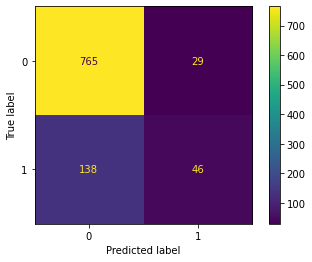

In [149]:
# display the diagram of confusion_matrix.

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Lr,X_test_scaled, y_test)
plt.show()

This plot showes the possible outcome to the data set as:
#### True Positive: Predicted values correctly predicted as actual positive.
#### False Positive: Predicted values incorrectly predicted as actual positive.
####  False Negative: Positive values predicted as negative.
#### True Negative: Predicted values correctly predicted as an actual negative.

### we decide to use another model to increas the efficiency of the data set.

### 2-RandomForestClassifier Model:

In [162]:
# we import library for modeling called sklearn
#from this sklearn we use ensemble and metrics methods 

from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(min_samples_leaf = 5)
Rf.fit(X_train_scaled,y_train)

RandomForestClassifier(min_samples_leaf=5)

In [163]:
Rf_pred = Rf.predict(X_test_scaled)

In [164]:
from sklearn.metrics import classification_report

print(classification_report(Rf_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       906
           1       0.32      0.82      0.46        72

    accuracy                           0.86       978
   macro avg       0.65      0.84      0.69       978
weighted avg       0.93      0.86      0.89       978



Becuse of the imbalace data that we have in the data set we consider weighted avg rather than the accuracy.
As we see in this table the weighted avg is 91% which is excellent .

#### Evaluating RandomForest model: 

In [165]:
Rf.score(X_train_scaled, y_train)

0.8846547314578005

In [166]:
Rf.score(X_test_scaled, y_test)

0.8588957055214724

After evaluating the model we found that the prediction is nearly equal the data.

### We use confusion matrix to  summarized the prediction results on a classification problem.

In [155]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Rf_pred)

array([[779,  15],
       [124,  60]], dtype=int64)

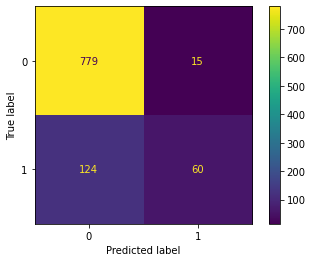

In [156]:
# display the diagram of confusion_matrix.

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Rf,X_test_scaled, y_test)
plt.show()

This plot showes the possible outcome to the data .

## The Conclousion of the project is summrized in two phases:
### First Phase : EDA
#### we discovered thats the best customers we foucs on are marketing are: 

#### Male gender - Age 29 - Married statues - Designation as executive - Dont have a passport - From city tair (1) - Basic packge.

### Second Phase: Modiling
#### we used two different types of modeling (logistic - randomforest), We got a good result in logistic model but we wanted to get 
#### an amazing result through randomforest model.

### Project Supervised by Senior Data Science Trainer : Dr. Ahmad

## Data Analysis and modeling by: 
### Nehal Aljohani - Alhanouf Alfattah